In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

## 一、特征工程

In [6]:
X = data.copy()
y = target.copy()

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
# 使用numpy库的concatenate函数，将全1数组（形状为(506,1)）与X进行横向拼接，并将结果赋值给X
X = np.concatenate((X, np.ones(shape=(X.shape[0], 1))), axis=1)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
display(X_train.shape, X_test.shape)

(404, 14)

(102, 14)

In [14]:
display(y_train.shape, y_test.shape)

(404,)

(102,)

In [20]:
feature_names = ['crim','zn','indus','chas','nox','rm','age','dis','rad','tax','ptradio','b','lstat']

In [21]:
house_df = pd.DataFrame(data=data, columns=feature_names)
house_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptradio,b,lstat
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## 二、线性回归正规方程求解

$$
\theta = (X^TX)^{-1}X^Ty
$$

In [15]:
theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

In [16]:
theta

array([-0.87655644,  1.07293926, -0.08713625,  0.74059517, -1.67957774,
        3.05106013, -0.56954433, -3.18522123,  1.87696934, -1.93774574,
       -1.83357079,  0.9455599 , -2.89280636, 22.22124102])

In [19]:
w = theta[:-1]
b = theta[[-1]]
display(w, b)

array([-0.87655644,  1.07293926, -0.08713625,  0.74059517, -1.67957774,
        3.05106013, -0.56954433, -3.18522123,  1.87696934, -1.93774574,
       -1.83357079,  0.9455599 , -2.89280636])

array([22.22124102])

## 三、特征选择

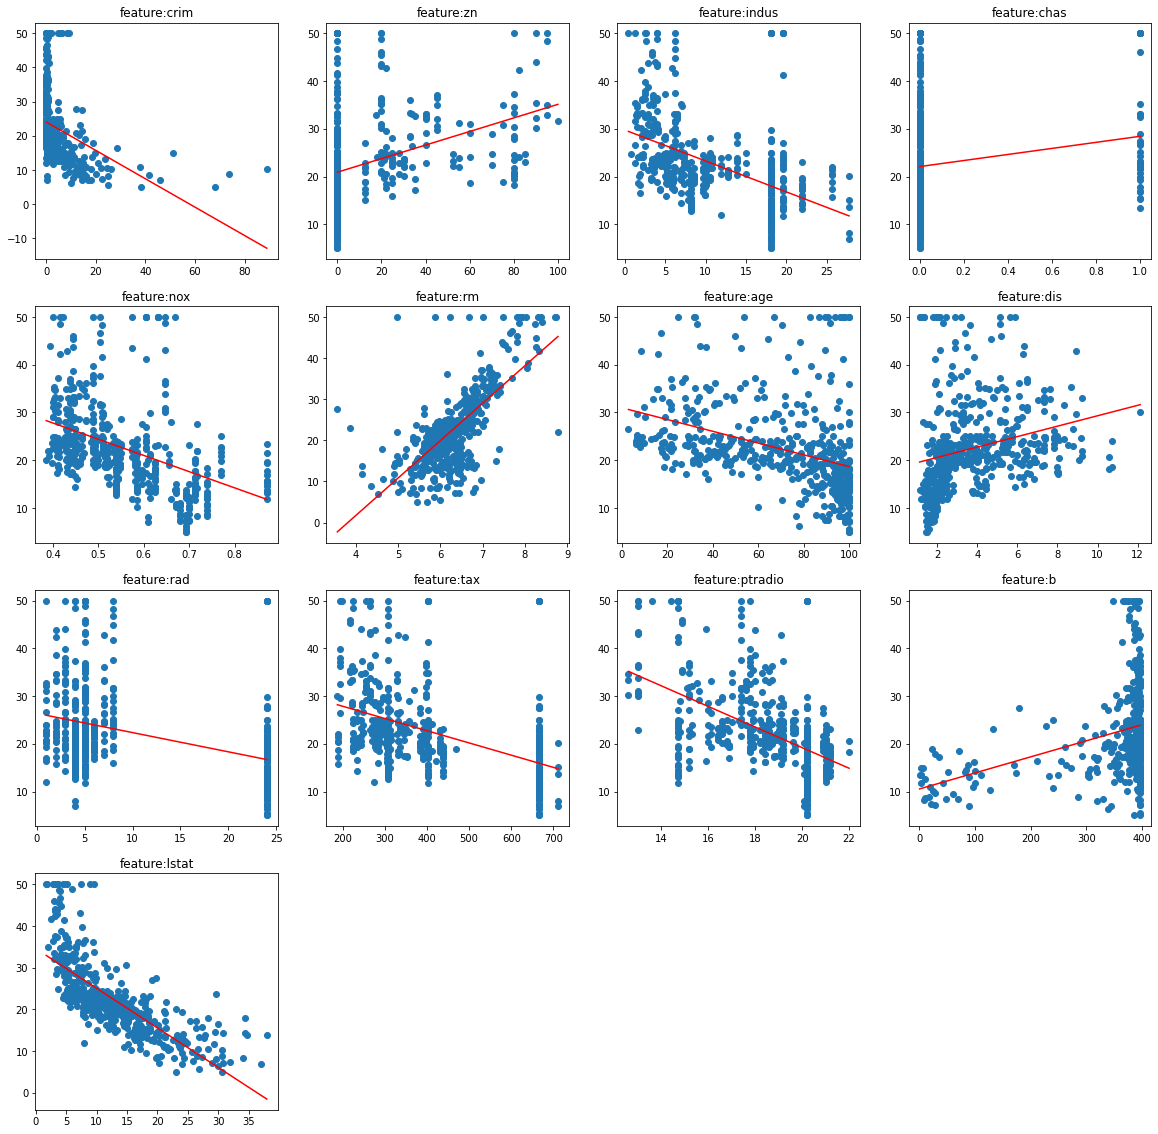

In [29]:
plt.figure(figsize=(4*5, 4*5))

for i, col in enumerate(feature_names, start=1):
    X = house_df[[col]].values
    linear = LinearRegression()
    linear.fit(X, target)
    X_test = np.linspace(X.min(), X.max(), num=100).reshape(-1, 1)
    y_ = linear.predict(X_test)
    axes = plt.subplot(4, 4, i)
    axes.scatter(X, target)
    axes.plot(X_test, y_, c='r')
    axes.set_title(f'feature:{col}')

## 四、批量梯度下降算法（BGD）

In [49]:
# 随机初始化参数
theta = np.random.randn(14, 1)

# 定义学习率
eta = 0.0005

# 初始化损失和上一次损失
loss = 0
last_loss = 1

梯度计算公式是通过矩阵运算得到的:

- 计算预测值：X_train.dot(theta)
- 计算误差：y_train.reshape(404,1) - X_train.dot(theta)
- 计算梯度：X_train.T.dot(X_train.dot(theta)-y_train.reshape(404,1))

In [145]:
X_train.shape  # 意味着索引是 0到 403

(404, 14)

In [51]:
theta.shape

(14, 1)

首先定义了损失函数梯度g的计算。这里的损失函数用的是均方误差（MSE），它是预测值与真实值之间的平方和的均值。对于线性回归模型$y=X\theta$（其中$X$是特征矩阵，$\theta$是模型参数向量，$y是目标向量$）MSE可以写作$\frac{1}{2n}\left \| X\theta-y \right \|^2$，其梯度（即损失函数关于$\theta$的导数）为$X^T(X\theta-y)$

In [52]:
# 迭代1000次
for i in range(2000):
    # 如果损失值的变化小于0.00001，则提前终止迭代
    if np.abs(loss - last_loss) < 1e-5:
        break
    # 计算梯度g，BGD特点：使用所有的训练数据来计算梯度
    g = X_train.T.dot(X_train.dot(theta)-y_train.reshape(-1,1))
    # 更新theta参数
    theta = theta - eta*g
    # 更新上一轮损失数值last_loss为当前损失值
    last_loss = loss
    # 更新当前损失，使用训练数据和参数计算预测值与实际值的差值，然后平方求和
    loss = ((X_train.dot(theta) - y_train.reshape(-1, 1))**2).sum()
    if i % 100 == 0:
        print(f'loss:{loss}')

loss:159257.21708890187
loss:7391.460768638754
loss:7383.349686429309
loss:7382.742936995375
loss:7382.694246657431


In [53]:
theta

array([[-0.87639318],
       [ 1.07255279],
       [-0.08820932],
       [ 0.74074084],
       [-1.67946457],
       [ 3.05128611],
       [-0.56972206],
       [-3.18533191],
       [ 1.87451539],
       [-1.93492853],
       [-1.83350817],
       [ 0.94553196],
       [-2.89260487],
       [22.2212482 ]])

## 五、随机梯度下降算法（SGD）

In [140]:
theta = np.random.randn(14, 1)
t0 = 1
t1 = 1000
t = 0

In [141]:
def learn(t):
    return t0 / (t + t1)

In [142]:
loss = 0
last_loss = 1

In [146]:
# 从0到403（包括0和403）之间随机选择一个整数，生成一个一维数组
np.random.choice(404, size=1)

array([300])

In [147]:
# 设置迭代次数上限
for i in range(2000):
    # 如果损失值变化小于阈值，则停止迭代
    if np.abs(loss - last_loss) < 1e-7:
        break
    # 随机选择一个样本
    index = np.random.choice(404, size=1)
    X_i = X_train[index]  # X_train.shape 是 (404, 14)
    y_i = y_train[index]
    # 计算梯度
    g = X_i.T.dot(X_i.dot(theta) - y_i)
    # 更新学习率
    eta = learn(t)
    # 更新参数
    theta = theta - eta*g
    # 更新损失函数值
    last_loss = loss
    loss = ((X_i.dot(theta) - y_i)**2).sum()

In [148]:
# 随机一个从[0, 5)中取值，size=(2, 2)的矩阵
np.random.choice(5, size=(2, 2))

array([[0, 2],
       [2, 1]])

In [150]:
theta

array([[-0.48242719],
       [-0.02305249],
       [-1.08076809],
       [ 1.44044761],
       [-0.61221533],
       [ 3.16150137],
       [-0.82075964],
       [-1.8383025 ],
       [ 0.4263733 ],
       [-0.23368445],
       [-1.86397758],
       [ 0.67486518],
       [-2.9515222 ],
       [19.6615836 ]])

## 六、小批量梯度下降算法（MBGD）

In [205]:
# 初始化参数theta，eta，损失值loss，上一轮损失值last_loss，批量大小break_size
theta = np.random.randn(14, 1)

In [206]:
eta = 0.0001
loss = 0
last_loss = 1

In [207]:
batch_size = 32

In [208]:
arr = np.arange(10)
arr

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

np.random.shuffle(arr) 和 np.random.permutation(arr) 都是NumPy库中用于随机重排数组元素的函数，但它们之间存在一些关键区别：

1、in-place操作 vs 返回新数组：

- np.random.shuffle(arr)：这个函数会就地修改输入的数组arr，直接对其进行随机重排，不返回任何值（返回None）。原数组的元素顺序会被永久改变。
- np.random.permutation(arr)：这个函数不会修改输入的数组，而是返回一个新的数组，该数组包含输入数组的元素，但顺序是随机排列的。原数组保持不变。


2、输入灵活性：

- np.random.shuffle(arr)：要求输入的arr是一个一维数组或者是一个可迭代对象（在实践中，通常是一维数组）。它不能直接应用于多维数组的整个结构上进行shuffle。
- np.random.permutation(arr)：更加灵活，可以接受一维数组、整数或者一个多维数组作为输入。如果输入是整数n，则返回一个从0到n-1的随机排列数组；如果是多维数组，它会首先将多维数组扁平化为一维，然后再进行随机排列，但最终返回的仍然是与原数组形状相同的排列结果。

In [209]:
# shuffle会就地修改输入的数组
np.random.shuffle(arr)
arr

array([0, 9, 2, 5, 1, 4, 8, 7, 6, 3])

In [210]:
# permutation返回一个新的数组，该数组包含输入数组的元素，但顺序是随机排列的。原数组保持不变。
np.random.permutation(arr)

array([8, 2, 1, 0, 6, 9, 4, 5, 3, 7])

In [211]:
# 迭代5000次
for i in range(5000):
    # 如果损失值变化小于1e-7，跳出循环
    if np.abs(loss - last_loss) < 1e-7:
        break
    # 随机选择一个小批量样本索引
    batch_indices = np.random.choice(len(X_train), size=batch_size, replace=False)
    # 根据批量索引获取训练数据和标签
    X_batch = X_train[batch_indices]
    y_batch = y_train[batch_indices]
    # 计算小批量的梯度
    gradients_sum = np.zeros_like(theta)
    for Xi, yi in zip(X_batch, y_batch):
        gradients_sum += ((Xi.dot(theta) - yi) * Xi.reshape(-1, 1))
    g = gradients_sum / batch_size
    
    # 更新参数theta
    theta = theta - eta*g
    # 更新上一轮损失值
    last_loss = loss
    # 更新当前轮的损失，这里也可以计算小批量的平均损失代替单个样本的损失累加
    loss = np.sum((X_batch.dot(theta) - y_batch.reshape(-1, 1))**2) / batch_size
    if i % 200 == 0:
        print(f'loss:{loss}')

loss:602.4040227484167
loss:598.1484840545108
loss:778.3738032835249
loss:476.57962638145034
loss:497.6360235262325
loss:491.97074296005223
loss:471.6563377232094
loss:404.8122349597404
loss:592.6572850860276
loss:501.98807433328653
loss:451.4236484142788
loss:398.3842040615193
loss:333.32353747947826
loss:400.5461846415296
loss:359.39186741891956
loss:379.7946332553499
loss:376.6975335873087
loss:373.4331436457978
loss:297.5957995980375
loss:436.14237376254175
loss:329.36263968942944
loss:245.23339517370394
loss:373.3849021302159
loss:273.12761177078255
loss:258.8289058023844


In [212]:
theta

array([[-0.97791063],
       [ 1.50657834],
       [-1.32540611],
       [ 1.46984391],
       [-0.68092868],
       [ 1.51753931],
       [ 0.28468972],
       [ 0.39928149],
       [-0.34171754],
       [-0.30331048],
       [-0.45249493],
       [ 1.35114108],
       [-1.0528564 ],
       [ 7.26024179]])

## 七、选择一个特征来可视化展示

In [213]:
X_train = house_df['rm'].values

In [216]:
X_train.shape

(506,)

In [217]:
X_train = X_train.reshape(-1, 1)

In [219]:
X_train.shape

(506, 1)

In [220]:
X_train = np.concatenate((X_train, np.ones_like(X_train)), axis=1)

In [221]:
X_train

array([[6.575, 1.   ],
       [6.421, 1.   ],
       [7.185, 1.   ],
       ...,
       [6.976, 1.   ],
       [6.794, 1.   ],
       [6.03 , 1.   ]])

### BDG

In [223]:
target.shape

(506,)

In [224]:
target.reshape(-1, 1)

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [234]:
target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

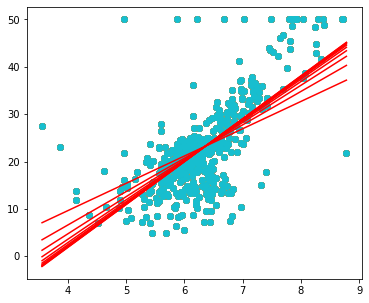

In [253]:
# 设置画布大小
plt.figure(figsize=(6, 5))

# 初始化参数
theta = np.random.randn(2, 1)  # 随机生成初始参数
eta = 1e-5  # 学习率
loss = 0  # 损失值初始化
last_loss = 1  # 上一轮损失值初始化
epsilon = 1e-8  # 添加一个小的正数防止除以零的情况

# 迭代更新参数
for j in range(10):  # 外层循环，进行10次迭代
    for i in range(8000):  # 内层循环，每次迭代8000次
        # 如果损失值变化小于阈值，则跳出内层循环
        if np.abs(loss - last_loss) < 1e-5:
            break
        # 计算梯度
        g = X_train.T.dot(X_train.dot(theta) - target.reshape(-1, 1)) + epsilon
        # 更新参数
        theta = theta - eta * g
        # 更新上一轮损失值
        last_loss = loss
        # 计算当前损失值
        loss = np.sum((X_train.dot(theta) - target.reshape(-1, 1))**2)
    # 生成测试数据
    X_test = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), num=1000).reshape(-1, 1)
    y_ =  theta[0] * X_test + theta[1]
    # 绘制训练数据的散点图
    plt.scatter(X_train[:, 0], target)
    # 绘制拟合直线
    plt.plot(X_test, y_, c='r')

# 显示图像
plt.show()

In [252]:
# 查看模型参数
theta

array([[  9.08934736],
       [-34.58944259]])